# 6.0 - Visualizations of Qwen3 finetuning results

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Fetching results from the finetuning

In [2]:
data = {}
for file in os.listdir(os.path.join(os.getcwd(), '..', 'results')):
    if file.endswith('.json'):
        with open(os.path.join(os.getcwd(), '..', 'results', file), 'r') as f:
            data[file.split('_results')[0]] = json.load(f)

print(data)

{'Qwen3-0.6B': {'base_model': 'Qwen/Qwen3-0.6B', 'finetuning': False, 'use_dora': True, 'n_epochs': 1, 'lora_r': 8, 'lora_alpha': 16, 'lr': 0.0005, 'batch_size': 4, 'lora_projections': ['q_proj', 'v_proj', 'k_proj', 'o_proj'], 'lora_dropout': 0.05, 'new_tokens_path': None, 'new_tokens_init': 'random', 'new_tokens_train': True, 'wandb_project': 'Orange-LoRA-tutorial', 'model_name': 'Qwen3-0.6B', 'accuracy_mcq': 7.0, 'se_mcq': 1.8041618552668715, 'accuracy_mcq_con': 11.5, 'se_mcq_con': 2.255825791146116}, 'Qwen3-0.6B_DoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5_ntinit(average)_nttrain': {'base_model': 'Qwen/Qwen3-0.6B', 'finetuning': True, 'use_dora': True, 'n_epochs': 5, 'lora_r': 8, 'lora_alpha': 16, 'lr': 0.0005, 'batch_size': 16, 'lora_projections': ['q_proj', 'v_proj', 'k_proj', 'o_proj'], 'lora_dropout': 0.05, 'new_tokens_path': 'data/injected_tokens.json', 'new_tokens_init': 'average', 'new_tokens_train': True, 'wandb_project': 'Orange-LoRA-tutorial', 'model_name': '

## Plot LoRA and DoRA R and alpha pairs

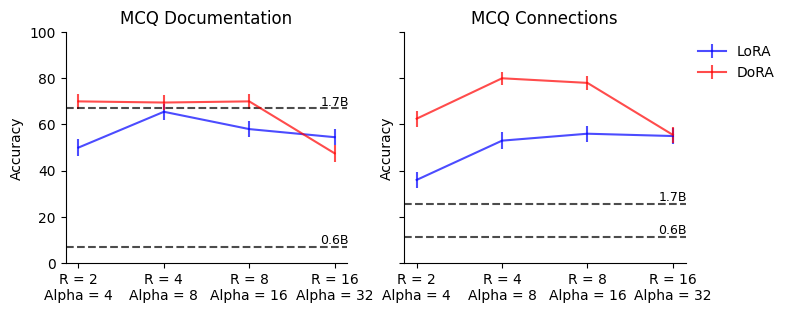

In [3]:
baseline_06 = "Qwen3-0.6B"
baseline_17 = "Qwen3-1.7B"

lora_models = [
    "Qwen3-0.6B_LoRA_qvkogdu_r2_alpha4_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_LoRA_qvkogdu_r4_alpha8_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_LoRA_qvkogdu_r8_alpha16_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_LoRA_qvkogdu_r16_alpha32_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
]
dora_models = [
    "Qwen3-0.6B_DoRA_qvkogdu_r2_alpha4_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_DoRA_qvkogdu_r4_alpha8_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_DoRA_qvkogdu_r8_alpha16_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_DoRA_qvkogdu_r16_alpha32_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
]

## Plot results
f, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True) 

plot_data = {}
for method, models in [("LoRA", lora_models), ("DoRA", dora_models)]:
    plot_data[method] = {
        f"R = {data[model_name]['lora_r']}, Alpha = {data[model_name]['lora_alpha']}": {
            "accuracy_mcq": data[model_name]["accuracy_mcq"],
            "accuracy_mcq_con": data[model_name]["accuracy_mcq_con"],
            "se_mcq": data[model_name]["se_mcq"],
            "se_mcq_con": data[model_name]["se_mcq_con"],
            "x": np.log2(int(data[model_name]["lora_r"])),
        }
        for model_name in models
    }

# Plot 1: MCQ Accuracy
color_dict = {
    "LoRA": "blue",
    "DoRA": "red",
}
for method in plot_data.keys():
    ax[0].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq"] for x in plot_data[method].values()],
        yerr=[x["se_mcq"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[0].set_title("MCQ Documentation")
ax[0].set_ylabel("Accuracy")
ax[0].set_xticks([1,2,3,4], [x.replace(", ", "\n") for x in plot_data["LoRA"].keys()])

ax[0].axhline(y=data[baseline_06]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[0].text(4, data[baseline_06]["accuracy_mcq"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[0].axhline(y=data[baseline_17]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[0].text(4, data[baseline_17]["accuracy_mcq"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

# Plot 2: MCQ con Accuracy
for method in plot_data.keys():
    ax[1].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq_con"] for x in plot_data[method].values()],
        yerr=[x["se_mcq_con"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[1].set_title("MCQ Connections")
ax[1].legend(frameon=False, bbox_to_anchor=(1, 1))
ax[1].set_ylabel("Accuracy")
ax[1].set_xticks([1,2,3,4], [x.replace(", ", "\n") for x in plot_data["LoRA"].keys()])

ax[1].axhline(y=data[baseline_06]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[1].text(4, data[baseline_06]["accuracy_mcq_con"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[1].axhline(y=data[baseline_17]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[1].text(4, data[baseline_17]["accuracy_mcq_con"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

ax[1].set_ylim(0, 100)

for i in range(len(ax)):
    for loc in ["right", "top"]:
        ax[i].spines[loc].set_visible(False)

plt.savefig("../figures/lora-rank-comparison.png", dpi=300, bbox_inches="tight")

## Plot LoRA and DoRA with different projections

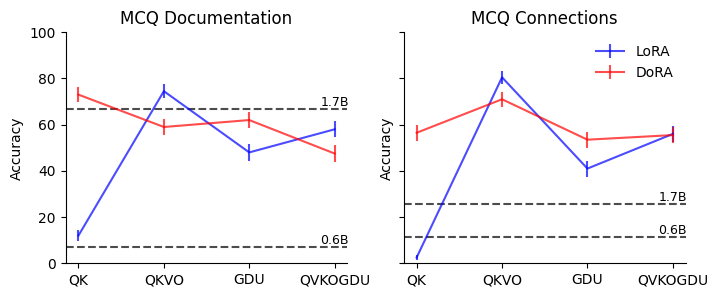

In [4]:
baseline_06 = "Qwen3-0.6B"
baseline_17 = "Qwen3-1.7B"

lora_models = [
    "Qwen3-0.6B_LoRA_qk_r8_alpha16_drop0.05_proj(qk)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_LoRA_qkvo_r8_alpha16_drop0.05_proj(qkvo)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_LoRA_gdu_r8_alpha16_drop0.05_proj(gdu)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_LoRA_qvkogdu_r8_alpha16_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
]
dora_models = [
    "Qwen3-0.6B_DoRA_qk_r8_alpha16_drop0.05_proj(qk)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_DoRA_qkvo_r8_alpha16_drop0.05_proj(qkvo)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_DoRA_gdu_r8_alpha16_drop0.05_proj(gdu)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_DoRA_qvkogdu_r16_alpha32_drop0.05_proj(qvkogdu)_bs16_lr0.0005_ep5__",
]

## Plot results
f, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True) 

plot_data = {}
for method, models in [("LoRA", lora_models), ("DoRA", dora_models)]:
    plot_data[method] = {
        "".join([x[0].upper() for x in data[model_name]["lora_projections"]]): {
            "accuracy_mcq": data[model_name]["accuracy_mcq"],
            "accuracy_mcq_con": data[model_name]["accuracy_mcq_con"],
            "se_mcq": data[model_name]["se_mcq"],
            "se_mcq_con": data[model_name]["se_mcq_con"],
            "x": i,
        }
        for i, model_name in enumerate(models, start=1)
        if model_name in data.keys()
    }

# Plot 1: MCQ Accuracy
color_dict = {
    "LoRA": "blue",
    "DoRA": "red",
}
for method in plot_data.keys():
    ax[0].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq"] for x in plot_data[method].values()],
        yerr=[x["se_mcq"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[0].set_title("MCQ Documentation")
ax[0].set_ylabel("Accuracy")
ax[0].set_xticks([1,2,3,4], [x.replace(", ", "\n") for x in plot_data["LoRA"].keys()])

ax[0].axhline(y=data[baseline_06]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[0].text(4, data[baseline_06]["accuracy_mcq"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[0].axhline(y=data[baseline_17]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[0].text(4, data[baseline_17]["accuracy_mcq"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

# Plot 2: MCQ con Accuracy
for method in plot_data.keys():
    ax[1].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq_con"] for x in plot_data[method].values()],
        yerr=[x["se_mcq_con"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[1].set_title("MCQ Connections")
ax[1].legend(frameon=False, bbox_to_anchor=(1, 1))
ax[1].set_ylabel("Accuracy")
ax[1].set_xticks([1,2,3,4], [x.replace(", ", "\n") for x in plot_data["LoRA"].keys()])

ax[1].axhline(y=data[baseline_06]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[1].text(4, data[baseline_06]["accuracy_mcq_con"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[1].axhline(y=data[baseline_17]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[1].text(4, data[baseline_17]["accuracy_mcq_con"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

ax[1].set_ylim(0, 100)

for i in range(len(ax)):
    for loc in ["right", "top"]:
        ax[i].spines[loc].set_visible(False)

plt.savefig("../figures/lora-projection-comparison.png", dpi=300, bbox_inches="tight")

## Plot for different R and alpha pairs (4/2, 4/4, 4/8, 4/16)

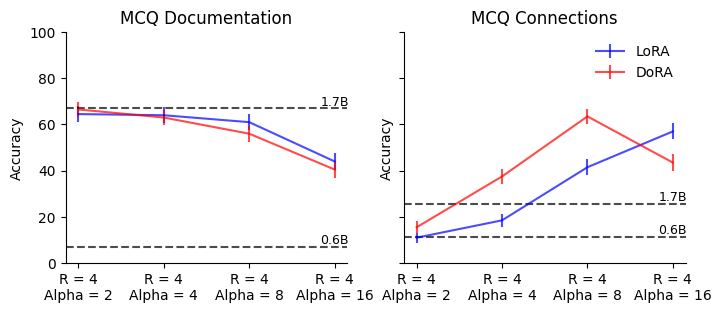

In [5]:
baseline_06 = "Qwen3-0.6B"
baseline_17 = "Qwen3-1.7B"

lora_models = [
    "Qwen3-0.6B_LoRA_qvko_r4_alpha2_drop0.05_proj(qvko)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_LoRA_qvko_r4_alpha4_drop0.05_proj(qvko)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_LoRA_qvko_r4_alpha8_drop0.05_proj(qvko)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_LoRA_qvko_r4_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5__",
]
dora_models = [
    "Qwen3-0.6B_DoRA_qvko_r4_alpha2_drop0.05_proj(qvko)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_DoRA_qvko_r4_alpha4_drop0.05_proj(qvko)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_DoRA_qvko_r4_alpha8_drop0.05_proj(qvko)_bs16_lr0.0005_ep5__",
    "Qwen3-0.6B_DoRA_qvko_r4_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5__",
]

## Plot results
f, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True) 

plot_data = {}
for method, models in [("LoRA", lora_models), ("DoRA", dora_models)]:
    plot_data[method] = {
        f"R = {data[model_name]['lora_r']}, Alpha = {data[model_name]['lora_alpha']}": {
            "accuracy_mcq": data[model_name]["accuracy_mcq"],
            "accuracy_mcq_con": data[model_name]["accuracy_mcq_con"],
            "se_mcq": data[model_name]["se_mcq"],
            "se_mcq_con": data[model_name]["se_mcq_con"],
            "x": i,
        }
        for i, model_name in enumerate(models, start=1)
    }

# Plot 1: MCQ Accuracy
color_dict = {
    "LoRA": "blue",
    "DoRA": "red",
}
for method in plot_data.keys():
    ax[0].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq"] for x in plot_data[method].values()],
        yerr=[x["se_mcq"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[0].set_title("MCQ Documentation")
ax[0].set_ylabel("Accuracy")
ax[0].set_xticks([1,2,3,4], [x.replace(", ", "\n") for x in plot_data["LoRA"].keys()])

ax[0].axhline(y=data[baseline_06]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[0].text(4, data[baseline_06]["accuracy_mcq"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[0].axhline(y=data[baseline_17]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[0].text(4, data[baseline_17]["accuracy_mcq"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

# Plot 2: MCQ con Accuracy
for method in plot_data.keys():
    ax[1].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq_con"] for x in plot_data[method].values()],
        yerr=[x["se_mcq_con"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[1].set_title("MCQ Connections")
ax[1].legend(frameon=False, bbox_to_anchor=(1, 1))
ax[1].set_ylabel("Accuracy")
ax[1].set_xticks([1,2,3,4], [x.replace(", ", "\n") for x in plot_data["LoRA"].keys()])

ax[1].axhline(y=data[baseline_06]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[1].text(4, data[baseline_06]["accuracy_mcq_con"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[1].axhline(y=data[baseline_17]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[1].text(4, data[baseline_17]["accuracy_mcq_con"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

ax[1].set_ylim(0, 100)

for i in range(len(ax)):
    for loc in ["right", "top"]:
        ax[i].spines[loc].set_visible(False)

plt.savefig("../figures/lora-rank-alpha-comparison.png", dpi=300, bbox_inches="tight")

## Plot token injection

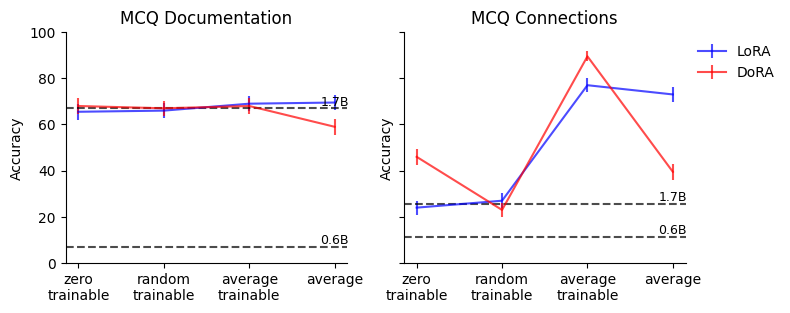

In [6]:
baseline_06 = "Qwen3-0.6B"
baseline_17 = "Qwen3-1.7B"

lora_models = [
    "Qwen3-0.6B_LoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5_ntinit(zero)_nttrain",
    "Qwen3-0.6B_LoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5_ntinit(random)_nttrain",
    "Qwen3-0.6B_LoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5_ntinit(average)_nttrain",
    "Qwen3-0.6B_LoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5_ntinit(average)_",
]
dora_models = [
    "Qwen3-0.6B_DoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5_ntinit(zero)_nttrain",
    "Qwen3-0.6B_DoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5_ntinit(random)_nttrain",
    "Qwen3-0.6B_DoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5_ntinit(average)_nttrain",
    "Qwen3-0.6B_DoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0005_ep5_ntinit(average)_",
]

## Plot results
f, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True) 

plot_data = {}
for method, models in [("LoRA", lora_models), ("DoRA", dora_models)]:
    plot_data[method] = {
        f"{data[model_name]['new_tokens_init']}, {'trainable' if data[model_name]['new_tokens_train'] else ''}": {
            "accuracy_mcq": data[model_name]["accuracy_mcq"],
            "accuracy_mcq_con": data[model_name]["accuracy_mcq_con"],
            "se_mcq": data[model_name]["se_mcq"],
            "se_mcq_con": data[model_name]["se_mcq_con"],
            "x": i,
        }
        for i, model_name in enumerate(models, start=1)
    }

# Plot 1: MCQ Accuracy
color_dict = {
    "LoRA": "blue",
    "DoRA": "red",
}
for method in plot_data.keys():
    ax[0].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq"] for x in plot_data[method].values()],
        yerr=[x["se_mcq"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[0].set_title("MCQ Documentation")
ax[0].set_ylabel("Accuracy")
ax[0].set_xticks([1,2,3,4], [x.replace(", ", "\n") for x in plot_data["LoRA"].keys()])

ax[0].axhline(y=data[baseline_06]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[0].text(4, data[baseline_06]["accuracy_mcq"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[0].axhline(y=data[baseline_17]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[0].text(4, data[baseline_17]["accuracy_mcq"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

# Plot 2: MCQ con Accuracy
for method in plot_data.keys():
    ax[1].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq_con"] for x in plot_data[method].values()],
        yerr=[x["se_mcq_con"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[1].set_title("MCQ Connections")
ax[1].legend(frameon=False, bbox_to_anchor=(1, 1))
ax[1].set_ylabel("Accuracy")
ax[1].set_xticks([1,2,3,4], [x.replace(", ", "\n") for x in plot_data["LoRA"].keys()])

ax[1].axhline(y=data[baseline_06]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[1].text(4, data[baseline_06]["accuracy_mcq_con"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[1].axhline(y=data[baseline_17]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[1].text(4, data[baseline_17]["accuracy_mcq_con"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

ax[1].set_ylim(0, 100)

for i in range(len(ax)):
    for loc in ["right", "top"]:
        ax[i].spines[loc].set_visible(False)

plt.savefig("../figures/lora-token-init-comparison.png", dpi=300, bbox_inches="tight")

## Plot performance over multiple runs

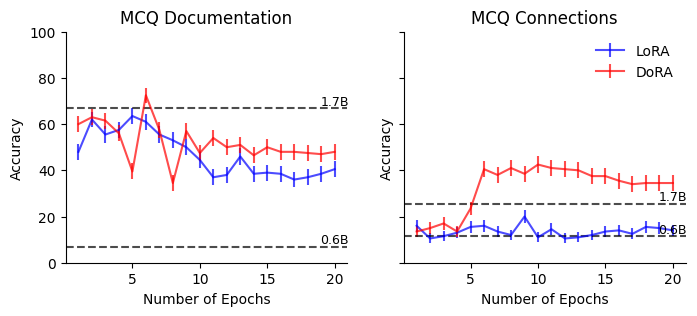

In [10]:
baseline_06 = "Qwen3-0.6B"
baseline_17 = "Qwen3-1.7B"

lora_models = [
    f"Qwen3-0.6B_LoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0001_ep20({i})__"
    for i in range(1, 21)
]
dora_models = [
    f"Qwen3-0.6B_DoRA_qvko_r8_alpha16_drop0.05_proj(qvko)_bs16_lr0.0001_ep20({i})__"
    for i in range(1, 21)
]

## Plot results
f, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True) 

plot_data = {}
for method, models in [("LoRA", lora_models), ("DoRA", dora_models)]:
    plot_data[method] = {
        f"{data[model_name]['n_epochs']}": {
            "accuracy_mcq": data[model_name]["accuracy_mcq"],
            "accuracy_mcq_con": data[model_name]["accuracy_mcq_con"],
            "se_mcq": data[model_name]["se_mcq"],
            "se_mcq_con": data[model_name]["se_mcq_con"],
            "x": data[model_name]['n_epochs'],
        }
        for i, model_name in enumerate(models, start=1)
        if model_name in data.keys()
    }

# Plot 1: MCQ Accuracy
color_dict = {
    "LoRA": "blue",
    "DoRA": "red",
}
for method in plot_data.keys():
    ax[0].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq"] for x in plot_data[method].values()],
        yerr=[x["se_mcq"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[0].set_title("MCQ Documentation")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Number of Epochs")

ax[0].axhline(y=data[baseline_06]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[0].text(20, data[baseline_06]["accuracy_mcq"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[0].axhline(y=data[baseline_17]["accuracy_mcq"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[0].text(20, data[baseline_17]["accuracy_mcq"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

# Plot 2: MCQ con Accuracy
for method in plot_data.keys():
    ax[1].errorbar(
        [x["x"] for x in plot_data[method].values()],
        [x["accuracy_mcq_con"] for x in plot_data[method].values()],
        yerr=[x["se_mcq_con"] for x in plot_data[method].values()],
        label=method,
        color=color_dict[method],
        alpha=0.7,
    )
ax[1].set_title("MCQ Connections")
ax[1].legend(frameon=False, bbox_to_anchor=(1, 1))
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Number of Epochs")

ax[1].axhline(y=data[baseline_06]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 0.6B")
ax[1].text(20, data[baseline_06]["accuracy_mcq_con"], "0.6B", ha="center", va="bottom", fontsize=9, color="black")
ax[1].axhline(y=data[baseline_17]["accuracy_mcq_con"], color="black", linestyle="--", alpha=0.7, label="Baseline 1.7B")
ax[1].text(20, data[baseline_17]["accuracy_mcq_con"], "1.7B", ha="center", va="bottom", fontsize=9, color="black")

ax[1].set_ylim(0, 100)

for i in range(len(ax)):
    for loc in ["right", "top"]:
        ax[i].spines[loc].set_visible(False)

plt.savefig("../figures/lora-n-epochs-comparison.png", dpi=300, bbox_inches="tight")